Link to Excel file of extracted features: https://drive.google.com/drive/u/1/folders/1ZMbW7HxNkBUAlnT-_lXLD4J_r0A778SJ

In [11]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


In [12]:
# read in features csv file
df = pd.read_csv('k_features.csv')
df

,Total Power,Abs LFP,Abs HFP,nLFP,nHFP,LF/HF,RMSSD,SDNN,label
0,1541.069640,399.630808,1030.815255,0.259320,0.668896,0.387684,932.041072,58.215908,k_pre
1,1908.063027,441.917310,1290.276023,0.231605,0.676223,0.342498,951.616941,39.751750,k_pre
2,2104.493113,494.573976,1338.031473,0.235009,0.635798,0.369628,959.359266,28.853163,k_pre
3,1606.166934,386.074246,1127.115004,0.240370,0.701742,0.342533,939.579392,65.433713,k_pre
4,1891.535035,450.423540,1258.882659,0.238126,0.665535,0.357796,952.273628,37.131959,k_pre
...,...,...,...,...,...,...,...,...,...
91,1160.095357,223.552939,813.610805,0.192702,0.701331,0.274766,735.611693,147.849426,k_med
92,1420.536153,275.481168,1015.442748,0.193928,0.714831,0.271292,766.606858,156.710024,k_med
93,1393.953672,196.719824,1092.517596,0.141124,0.783755,0.180061,779.975532,148.275939,k_med
94,1267.482134,253.493676,906.193736,0.199998,0.714956,0.279735,760.283782,139.385959,k_med


<AxesSubplot:>

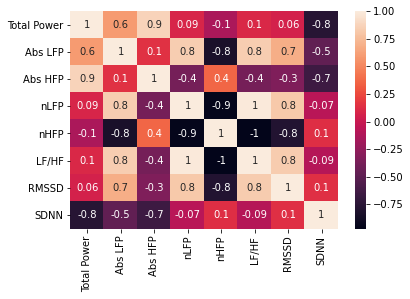

In [13]:
# df.corr()
sns.heatmap(df.corr(), annot = True, fmt='.1g')

In [14]:
# target variables
Y = df['label'].values
# features
X = df.drop(labels = ['label'], axis = 1)

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [15]:
arr = ["{}{}".format("PC", i) for i in np.arange(np.shape(df)[1]-1)+ 1]
(np.shape(df)[1]-1)+ 1
arr

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=arr)
dfp = pd.merge(df, pca_df, right_index=True, left_index=True)
print('Explained Variance Ratio')
for i in range(len(arr)):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

Explained Variance Ratio
PC1: 0.5717321578419174
PC2: 0.3449563539860616
PC3: 0.05677796662323021
PC4: 0.01653425889702261
PC5: 0.00784284323357652
PC6: 0.0014540278868664725
PC7: 0.0006833708690675864
PC8: 1.9020662257498526e-05


In [17]:
pca = PCA(.99)
X_pca = pca.fit_transform(X)
print('Explained Variance Ratio')
for i in range(len(arr)):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

Explained Variance Ratio
PC1: 0.5717321578419174
PC2: 0.3449563539860616
PC3: 0.05677796662323021
PC4: 0.01653425889702261


IndexError: index 4 is out of bounds for axis 0 with size 4

In [18]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC3','PC4'])
principalDf

,PC1,PC2,PC3,PC4
0,1.919234,1.225710,-1.287233,0.285046
1,1.629080,-0.495292,-0.689883,0.365053
2,2.341778,-1.181016,-0.758231,0.174319
3,1.229193,0.930177,-0.746822,0.327738
4,1.881406,-0.417269,-0.858387,0.351611
...,...,...,...,...
91,-0.584261,3.824609,-0.579344,-0.546390
92,-0.489981,2.892255,0.260431,-0.950496
93,-2.153267,2.608921,0.641948,-0.166193
94,-0.443943,3.236324,-0.394600,-0.524103


In [19]:
finalDf = pd.concat([principalDf, df['label']], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,label
0,1.919234,1.225710,-1.287233,0.285046,k_pre
1,1.629080,-0.495292,-0.689883,0.365053,k_pre
2,2.341778,-1.181016,-0.758231,0.174319,k_pre
3,1.229193,0.930177,-0.746822,0.327738,k_pre
4,1.881406,-0.417269,-0.858387,0.351611,k_pre
...,...,...,...,...,...
91,-0.584261,3.824609,-0.579344,-0.546390,k_med
92,-0.489981,2.892255,0.260431,-0.950496,k_med
93,-2.153267,2.608921,0.641948,-0.166193,k_med
94,-0.443943,3.236324,-0.394600,-0.524103,k_med


In [20]:
# save to a csv file
finalDf.to_csv('k_pca_features.csv',index=False)